In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
plant=1

In [3]:
target_df=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_alarm_data.csv')
target_daily=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_efficiency_alarm_data.csv')
model_outliers_lin=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_linear_alarm_data.csv')
model_daily_lin=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_linear_efficiency_alarm_data.csv')
model_outliers_linp=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_linear_partial_error_alarm_data.csv')
model_daily_linp=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_linear_partial_error_efficiency_alarm_data.csv')
model_outliers_dt=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_decisiontree_alarm_data.csv')
model_daily_dt=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_decisiontree_efficiency_alarm_data.csv')
model_outliers_dtp=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_decisiontree_partial_error_alarm_data.csv')
model_daily_dtp=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_decisiontree_partial_error_efficiency_alarm_data.csv')
if plant==1:
    model_outliers_ae=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_autoencodersimple_alarm_data.csv')
    model_daily_ae=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_autoencodersimple_efficiency_alarm_data.csv')
    model_outliers=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_autoencodermedium_alarm_data.csv')
    model_daily=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_autoencodermedium_efficiency_alarm_data.csv')
    model_outliers=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_autoencoderfinal_alarm_data.csv')
    model_daily=pd.read_csv('../data/processed_data/Plant_'+str(plant)+'_autoencoderfinal_efficiency_alarm_data.csv')

In [4]:
data=target_df[['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'alarm_DC_conversion_outlier']]\
    .merge(model_outliers_lin[['DATE_TIME', 'SOURCE_KEY', 'alarm_DC_conversion_outlier']], on=['DATE_TIME', 'SOURCE_KEY'], suffixes=("", "_lin"))\
    .merge(model_outliers_linp[['DATE_TIME', 'SOURCE_KEY', 'alarm_DC_conversion_outlier']], on=['DATE_TIME', 'SOURCE_KEY'], suffixes=("", "_linp"))\
    .merge(model_outliers_dt[['DATE_TIME', 'SOURCE_KEY', 'alarm_DC_conversion_outlier']], on=['DATE_TIME', 'SOURCE_KEY'], suffixes=("", "_dt"))\
    .merge(model_outliers_dtp[['DATE_TIME', 'SOURCE_KEY', 'alarm_DC_conversion_outlier']], on=['DATE_TIME', 'SOURCE_KEY'], suffixes=("", "_dtp"))
if plant==1:
    data=data.merge(model_outliers_ae[['DATE_TIME', 'SOURCE_KEY', 'alarm_DC_conversion_outlier']], on=['DATE_TIME', 'SOURCE_KEY'], suffixes=("", "_ae"))\
    .merge(model_outliers[['DATE_TIME', 'SOURCE_KEY', 'alarm_DC_conversion_outlier']], on=['DATE_TIME', 'SOURCE_KEY'], suffixes=("", "_aem"))\
    .merge(model_outliers[['DATE_TIME', 'SOURCE_KEY', 'alarm_DC_conversion_outlier']], on=['DATE_TIME', 'SOURCE_KEY'], suffixes=("", "_aef"))
data['DATE_TIME']= pd.to_datetime(data['DATE_TIME'])

In [5]:
#data=target_df
#data['DATE_TIME']= pd.to_datetime(data['DATE_TIME'])
weather_data = pd.read_csv('../data/Plant_'+str(plant)+'_Weather_Sensor_Data.csv')
weather_data['DATE_TIME']= pd.to_datetime(weather_data['DATE_TIME'])
data = pd.merge(data, weather_data[['DATE_TIME', 'IRRADIATION']], how='inner', on=['DATE_TIME'], suffixes=('', '_y'))
data['DATE']=data['DATE_TIME'].dt.date
data['HOUR']=data['DATE_TIME'].dt.hour

In [7]:
data.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,alarm_DC_conversion_outlier,alarm_DC_conversion_outlier_lin,alarm_DC_conversion_outlier_linp,alarm_DC_conversion_outlier_dt,alarm_DC_conversion_outlier_dtp,alarm_DC_conversion_outlier_ae,alarm_DC_conversion_outlier_aem,alarm_DC_conversion_outlier_aef,IRRADIATION,DATE,HOUR
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0,0,0,0,0,0,0,0,0.0,2020-05-15,0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0,0,0,0,0,0,0,0,0.0,2020-05-15,0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0,0,0,0,0,0,0,0,0.0,2020-05-15,0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0,0,0,0,0,0,0,0,0.0,2020-05-15,0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0,0,0,0,0,0,1,1,0.0,2020-05-15,0


### Outlier points for target

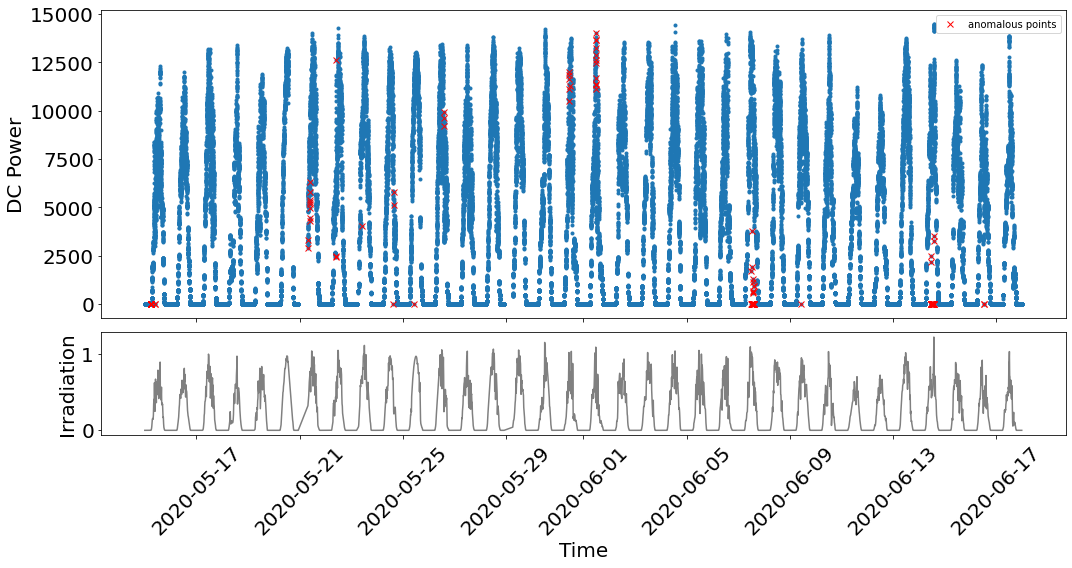

In [8]:
%matplotlib inline
f, ax=plt.subplots(2,1, figsize=(15, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(data['DATE_TIME'], data['DC_POWER'], '.')
ax[0].plot(data[data["alarm_DC_conversion_outlier"]==1]['DATE_TIME'], 
         data[data["alarm_DC_conversion_outlier"]==1]['DC_POWER'], 'rx', label="anomalous points")
ax[1].plot(data['DATE_TIME'], 
         data['IRRADIATION'], color='gray')
#plt.plot(merged_ac_conv_out[merged_ac_conv_out["alarm_AC_conversion_outlier"]==1]['DATE_TIME'], 
#         merged_ac_conv_out[merged_ac_conv_out["alarm_AC_conversion_outlier"]==1]['ERROR'], 'gx')
plt.xticks(rotation=45)
ax[1].set_xlabel('Time', fontsize=20)
ax[0].set_ylabel('DC Power', fontsize=20)
ax[1].set_ylabel('Irradiation', fontsize=20)
ax[0].legend()
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
plt.tight_layout()

In [9]:
data[(data["alarm_DC_conversion_outlier"]==1)&(data['DATE_TIME']<='2020-05-18')&(data['DATE_TIME']>='2020-05-17')]

,DATE_TIME,SOURCE_KEY,DC_POWER,alarm_DC_conversion_outlier,alarm_DC_conversion_outlier_lin,alarm_DC_conversion_outlier_linp,alarm_DC_conversion_outlier_dt,alarm_DC_conversion_outlier_dtp,alarm_DC_conversion_outlier_ae,alarm_DC_conversion_outlier_aem,alarm_DC_conversion_outlier_aef,IRRADIATION,DATE,HOUR


## Daily efficiency

In [10]:
model_daily_lin

,Unnamed: 0,SOURCE_KEY,DAY,ERROR,norm_error,alarm_negative_trend,alarm_DC_conversion_fall,alarm_DC_conversion_jump,alarm_inefficient_inverter_day,alarm_inefficient_inverter_window
0,0,1BY6WEcLGh8j5v7,136,509398.374272,0.185504,0,0,0,0,NaN
1,1,1IF53ai7Xc0U56Y,136,230394.320040,0.083901,0,0,0,0,NaN
2,2,3PZuoBAID5Wc2HD,136,472877.526781,0.172205,0,0,0,0,NaN
3,3,7JYdWkrLSPkdwr4,136,220453.726098,0.080281,0,0,0,0,NaN
4,4,McdE0feGgRqW7Ca,136,228323.086725,0.083147,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
743,743,uHbuxQJl8lW7ozc,169,133012.969011,0.048438,0,0,0,0,0.0
744,744,wCURE6d3bPkepu2,169,91167.010067,0.033200,0,0,0,0,0.0
745,745,z9Y9gH1T5YWrNuG,169,78600.387243,0.028623,0,0,0,0,0.0
746,746,zBIq5rxdHJRwDNY,169,73602.155396,0.026803,0,0,0,0,0.0


In [11]:
data_d=target_daily.merge(model_daily_lin, on=['DAY', 'SOURCE_KEY'], suffixes=("", "_lin"))\
    .merge(model_daily_linp, on=['DAY', 'SOURCE_KEY'], suffixes=("", "_linp"))\
    .merge(model_daily_dt, on=['DAY', 'SOURCE_KEY'], suffixes=("", "_dt"))\
    .merge(model_daily_dtp, on=['DAY', 'SOURCE_KEY'], suffixes=("", "_dtp"))
if plant==1:
    data_d=data_d.merge(model_daily_ae, on=['DAY', 'SOURCE_KEY'], suffixes=("", "_ae"))\
    .merge(model_daily, on=['DAY', 'SOURCE_KEY'], suffixes=("", "_aem"))\
    .merge(model_daily, on=['DAY', 'SOURCE_KEY'], suffixes=("", "_aef"))

In [12]:
data_d['DATE']=(np.asarray(2020, dtype='datetime64[Y]')-1970)+(np.asarray(data_d['DAY'], dtype='timedelta64[D]')-1)
data_d

,Unnamed: 0,SOURCE_KEY,DAY,DC_efficiency_unnorm,DC_efficiency,AC_efficiency_unnorm,AC_efficiency,alarm_negative_trend,alarm_negative_trend_temp,alarm_AC_negative_trend,...,alarm_inefficient_inverter_window_aem,Unnamed: 0_aef,ERROR_aef,norm_error_aef,alarm_negative_trend_aef,alarm_DC_conversion_fall_aef,alarm_DC_conversion_jump_aef,alarm_inefficient_inverter_day_aef,alarm_inefficient_inverter_window_aef,DATE
0,0,1BY6WEcLGh8j5v7,136,12654.292748,0.772615,0.097894,0.999364,0,0,0,...,NaN,0,0.001185,0.564230,0,0,0,0,NaN,2020-05-15
1,1,1IF53ai7Xc0U56Y,136,13565.308175,0.828237,0.097848,0.998894,0,0,0,...,NaN,1,0.001083,0.515244,0,0,0,0,NaN,2020-05-15
2,2,3PZuoBAID5Wc2HD,136,13360.674324,0.815743,0.097846,0.998875,0,0,0,...,NaN,2,0.001253,0.596369,0,0,0,0,NaN,2020-05-15
3,3,7JYdWkrLSPkdwr4,136,13241.189745,0.808448,0.097861,0.999036,0,0,0,...,NaN,3,0.001104,0.525579,0,0,0,0,NaN,2020-05-15
4,4,McdE0feGgRqW7Ca,136,13695.649535,0.836195,0.097827,0.998686,0,0,0,...,NaN,4,0.001049,0.499503,0,0,0,0,NaN,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,743,wCURE6d3bPkepu2,169,14232.372260,0.868965,0.097847,0.998891,0,0,0,...,0.0,744,0.000272,0.129489,0,0,0,0,0.0,2020-06-17
744,744,z9Y9gH1T5YWrNuG,169,13958.143903,0.852222,0.097856,0.998982,0,0,0,...,0.0,745,0.000253,0.120432,0,0,0,0,0.0,2020-06-17
745,745,zBIq5rxdHJRwDNY,169,14192.439087,0.866527,0.097844,0.998856,0,0,0,...,0.0,746,0.000278,0.132206,0,0,0,0,0.0,2020-06-17
746,746,zVJPv84UY57bAof,169,14450.859629,0.882305,0.097840,0.998820,0,0,0,...,0.0,747,0.000284,0.135154,0,0,0,0,0.0,2020-06-17


In [13]:
plt.figure(figsize=(15, 8))
plt.scatter(data.DATE_TIME, data.MODULE_TEMPERATURE)
plt.xlabel('Date', fontsize=20)
plt.ylabel('DC power generation efficiency', fontsize=20)
plt.xticks(rotation=45)
#plt.title('Daily efficiency of inverters')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

AttributeError: 'DataFrame' object has no attribute 'MODULE_TEMPERATURE'

<Figure size 1080x576 with 0 Axes>

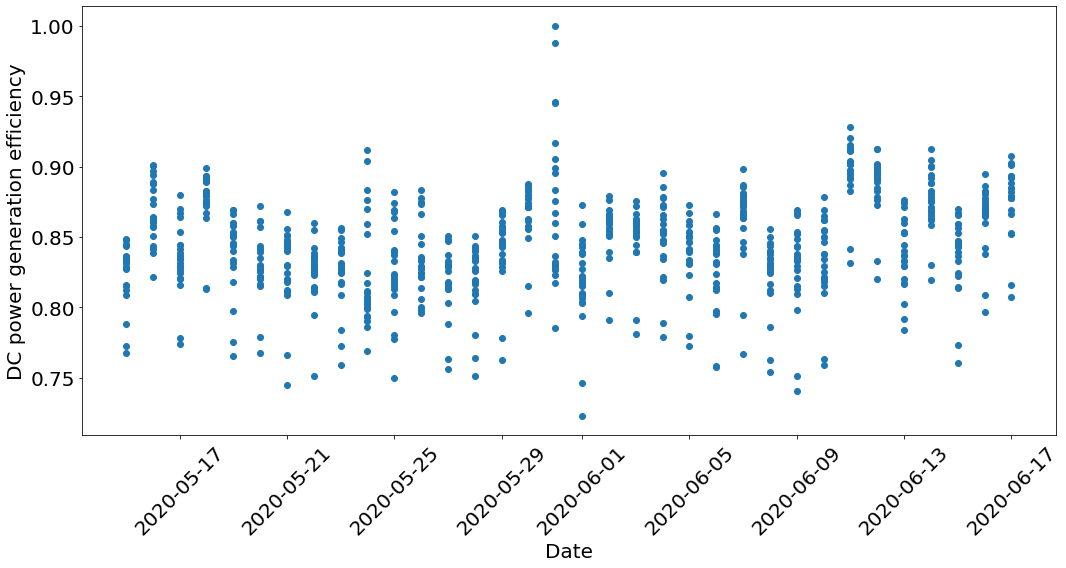

In [14]:
plt.figure(figsize=(15, 8))
plt.scatter(data_d.DATE, data_d.DC_efficiency)
plt.xlabel('Date', fontsize=20)
plt.ylabel('DC power generation efficiency', fontsize=20)
plt.xticks(rotation=45)
#plt.title('Daily efficiency of inverters')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

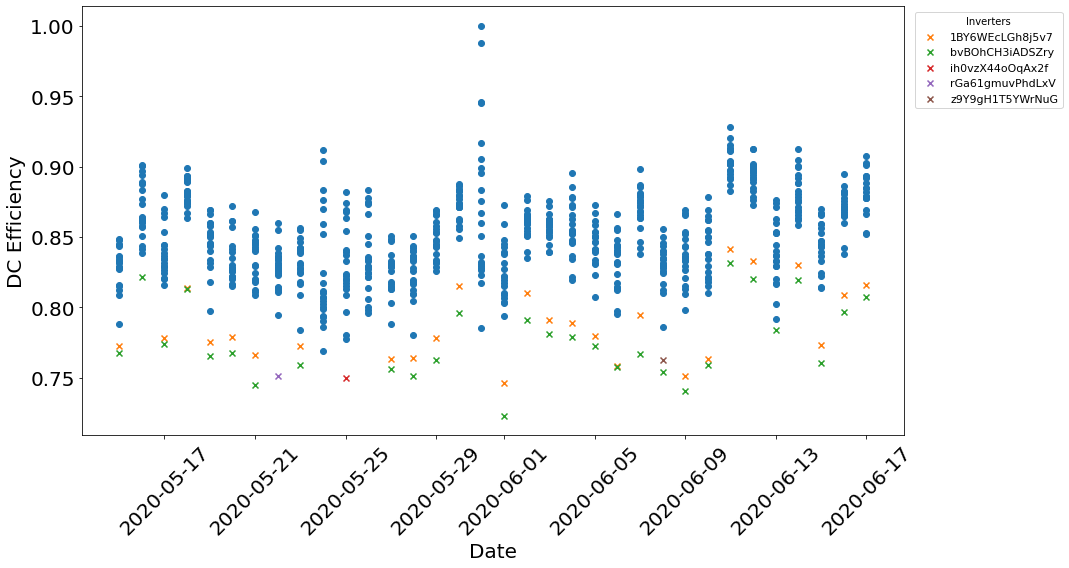

In [15]:
plt.figure(figsize=(15, 8))
plt.scatter(data_d[data_d['alarm_inefficient_inverter_day']!=1].DATE, data_d[data_d['alarm_inefficient_inverter_day']!=1].DC_efficiency)
for i, day in data_d[data_d['alarm_inefficient_inverter_day']==1].groupby(data_d[data_d['alarm_inefficient_inverter_day']==1].SOURCE_KEY):
        plt.scatter(day.DATE, day.DC_efficiency, marker="x",label=i)
plt.xticks(rotation=45)
#plt.ylim(daily_inv_error_df.ERROR.min()-0.001,daily_inv_error_df.ERROR.max()+0.001)
plt.xlabel('Date', fontsize=20)
plt.ylabel('DC Efficiency', fontsize=20)
plt.legend(loc="upper right", title="Inverters", bbox_to_anchor=(1.20,  1), fontsize=11)
#plt.title('Daily efficiency of inverters')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

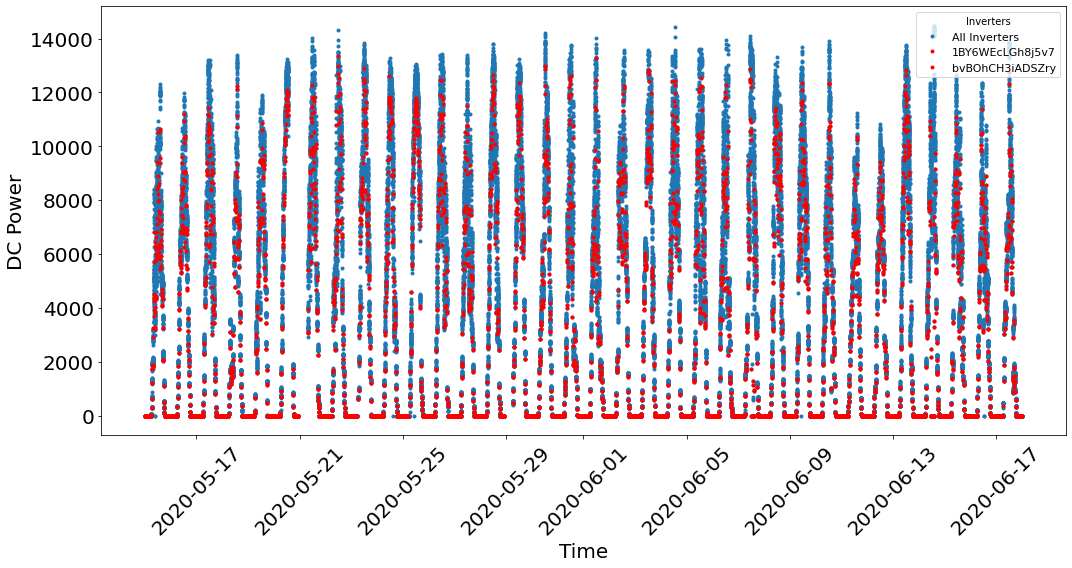

In [17]:
if plant==1:
    main_anomalous=["1BY6WEcLGh8j5v7", "bvBOhCH3iADSZry"]
if plant==2:
    main_anomalous=["Quc1TzYxW2pYoWX"]
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.plot(data['DATE_TIME'], data['DC_POWER'], '.', label="All Inverters")
for inv in main_anomalous:
    plt.plot(data[data["SOURCE_KEY"]==inv]['DATE_TIME'], 
         data[data["SOURCE_KEY"]==inv]['DC_POWER'], 'r.', label=inv)
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=20)
plt.ylabel('DC Power', fontsize=20)
plt.legend(title="Inverters", fontsize=11)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

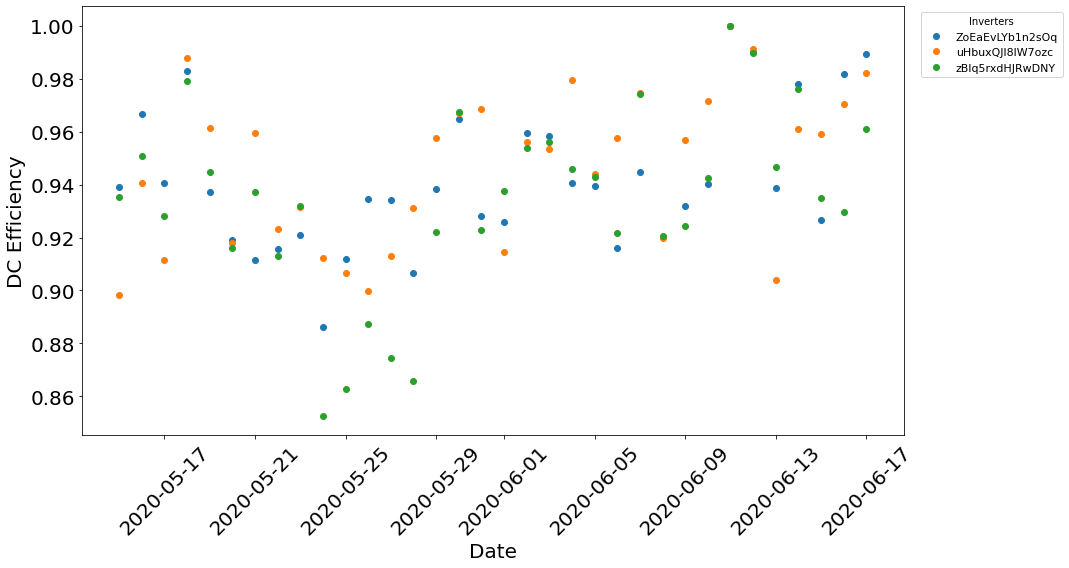

In [18]:
plt.figure(figsize=(15, 8))
for inv in data_d[data_d['alarm_negative_trend']==1].SOURCE_KEY.unique():
    plt.plot(data_d[data_d.SOURCE_KEY==inv]['DATE'], data_d[data_d.SOURCE_KEY==inv]['DC_efficiency']/data_d[data_d.SOURCE_KEY==inv]['DC_efficiency'].max(), 'o', label=inv)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.ylabel('DC Efficiency', fontsize=20)
plt.legend(loc="upper right", title="Inverters", bbox_to_anchor=(1.20,  1), fontsize=11)
#plt.title('Daily efficiency of inverters')
plt.yticks(fontsize=20)
plt.tight_layout()

<ipython-input-19-720d387ef677>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data_d[data_d.SOURCE_KEY==inv][data_d.alarm_DC_conversion_fall==1]['DATE'], data_d[data_d.SOURCE_KEY==inv][data_d.alarm_DC_conversion_fall==1]['DC_efficiency']/data_d[data_d.SOURCE_KEY==inv]['DC_efficiency'].max(), 'x', markersize=10, color=p[0].get_color())
<ipython-input-19-720d387ef677>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data_d[data_d.SOURCE_KEY==inv][data_d.alarm_DC_conversion_fall==1]['DATE'], data_d[data_d.SOURCE_KEY==inv][data_d.alarm_DC_conversion_fall==1]['DC_efficiency']/data_d[data_d.SOURCE_KEY==inv]['DC_efficiency'].max(), 'x', markersize=10, color=p[0].get_color())
<ipython-input-19-720d387ef677>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data_d[data_d.SOURCE_KEY==inv][data_d.alarm_DC_conversion_fall==1]['DATE'], data_d[data_d.SOURCE_KEY==inv][data_d.al

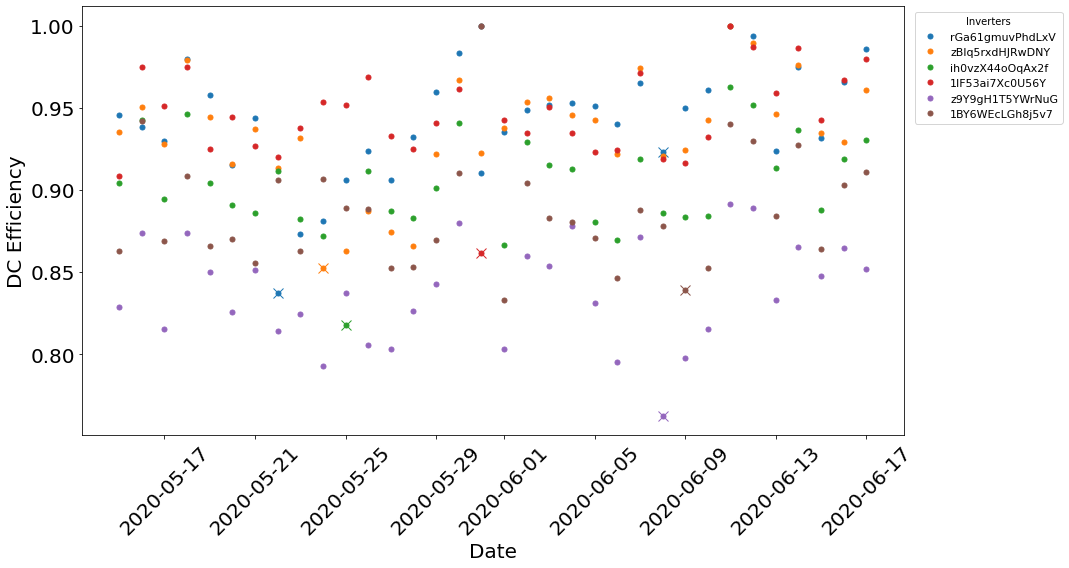

In [19]:
plt.figure(figsize=(15, 8))
for inv in data_d[data_d['alarm_DC_conversion_fall']==1].SOURCE_KEY.unique():
    p=plt.plot(data_d[data_d.SOURCE_KEY==inv]['DATE'], data_d[data_d.SOURCE_KEY==inv]['DC_efficiency']/data_d[data_d.SOURCE_KEY==inv]['DC_efficiency'].max(), '.', markersize=10, label=inv)
    plt.plot(data_d[data_d.SOURCE_KEY==inv][data_d.alarm_DC_conversion_fall==1]['DATE'], data_d[data_d.SOURCE_KEY==inv][data_d.alarm_DC_conversion_fall==1]['DC_efficiency']/data_d[data_d.SOURCE_KEY==inv]['DC_efficiency'].max(), 'x', markersize=10, color=p[0].get_color())
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.ylabel('DC Efficiency', fontsize=20)
plt.legend(loc="upper right", title="Inverters", bbox_to_anchor=(1.20,  1), fontsize=11)
#plt.title('Daily efficiency of inverters')
plt.yticks(fontsize=20)
plt.tight_layout()

## Comparison with models

In [20]:
column="alarm_DC_conversion_outlier"
columns=[col for col in data.columns if column in col]
for col in columns:
    print(data.groupby(column)[col].value_counts())

alarm_DC_conversion_outlier  alarm_DC_conversion_outlier
0                            0                              68639
1                            1                                135
Name: alarm_DC_conversion_outlier, dtype: int64
alarm_DC_conversion_outlier  alarm_DC_conversion_outlier_lin
0                            0                                  68562
                             1                                     77
1                            1                                     81
                             0                                     54
Name: alarm_DC_conversion_outlier_lin, dtype: int64
alarm_DC_conversion_outlier  alarm_DC_conversion_outlier_linp
0                            0                                   68567
                             1                                      72
1                            0                                      80
                             1                                      55
Name: alarm_DC_conversio

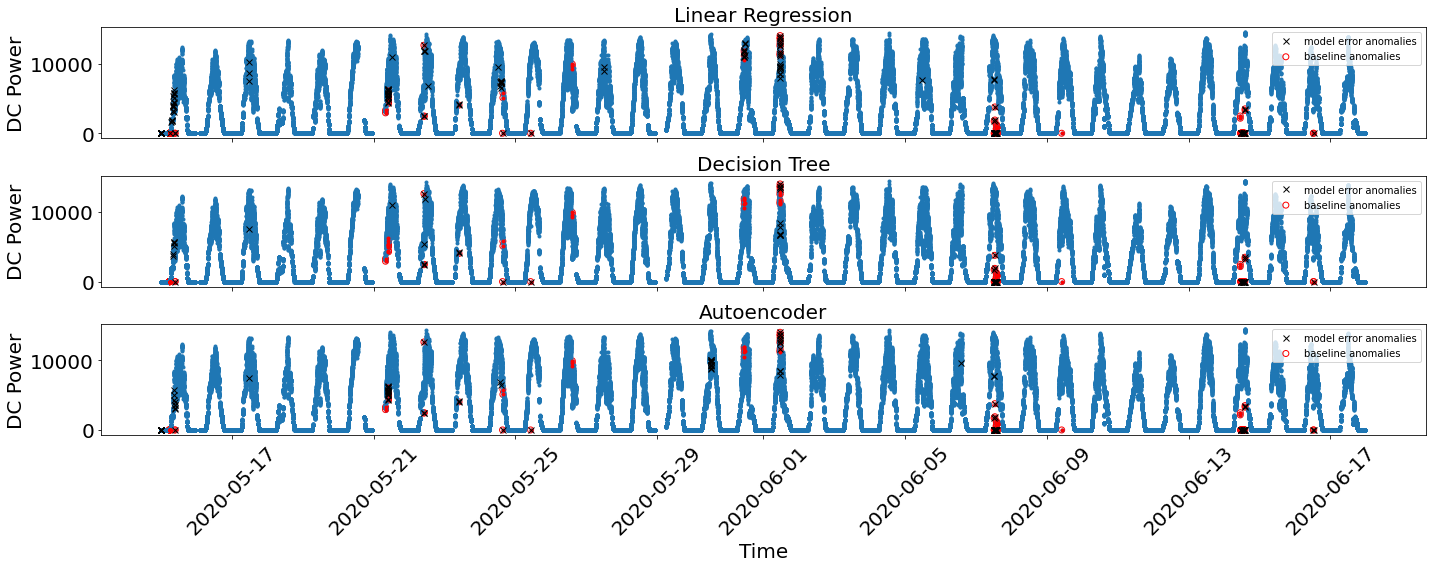

In [21]:
%matplotlib inline
titles=["Linear Regression", "Decision Tree", "Autoencoder"]
f, ax=plt.subplots(3,1, figsize=(20, 8), sharex=True)
i=0
for col in columns:
    if (col!=column)&(col[-1:]!="p")&(col[-2:]!="ae")&(col[-3:]!="aem"):
        ax[i].plot(data['DATE_TIME'], data['DC_POWER'], '.')
        ax[i].scatter(data[data["alarm_DC_conversion_outlier"]==1]['DATE_TIME'], 
                 data[data["alarm_DC_conversion_outlier"]==1]['DC_POWER'], facecolors='none', edgecolors='r', label="baseline anomalies")
        ax[i].plot(data[data["alarm_DC_conversion_outlier"]==1]['DATE_TIME'], 
                 data[data["alarm_DC_conversion_outlier"]==1]['DC_POWER'], 'r.', label=None)
        ax[i].plot(data[data[col]==1]['DATE_TIME'], 
                 data[data[col]==1]['DC_POWER'], 'kx', label="model error anomalies")
        ax[i].set_ylabel('DC Power', fontsize=20)
        ax[i].set_title(titles[i], fontsize=20)
        ax[i].tick_params(labelsize=20)
        ax[i].legend()
        i+=1
plt.xticks(rotation=45, fontsize=20)
ax[i-1].set_xlabel('Time', fontsize=20)
plt.tight_layout()

In [22]:
data_h=data.set_index('DATE_TIME').groupby(['SOURCE_KEY']).resample('1h')[columns+['DC_POWER', 'IRRADIATION']].max().reset_index()
data_h[data_h[columns].sum(axis=1)>1][columns]

,alarm_DC_conversion_outlier,alarm_DC_conversion_outlier_lin,alarm_DC_conversion_outlier_linp,alarm_DC_conversion_outlier_dt,alarm_DC_conversion_outlier_dtp,alarm_DC_conversion_outlier_ae,alarm_DC_conversion_outlier_aem,alarm_DC_conversion_outlier_aef
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
9,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
59,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
154,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
17143,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
17144,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17289,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
17507,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [23]:
column="alarm_DC_conversion_outlier"
columns=[col for col in data_h.columns if (column in col)]
for col in columns:
    print(data_h.groupby(column)[col].value_counts())

alarm_DC_conversion_outlier  alarm_DC_conversion_outlier
0.0                          0.0                            17353
1.0                          1.0                               84
Name: alarm_DC_conversion_outlier, dtype: int64
alarm_DC_conversion_outlier  alarm_DC_conversion_outlier_lin
0.0                          0.0                                17293
                             1.0                                   60
1.0                          1.0                                   52
                             0.0                                   32
Name: alarm_DC_conversion_outlier_lin, dtype: int64
alarm_DC_conversion_outlier  alarm_DC_conversion_outlier_linp
0.0                          0.0                                 17297
                             1.0                                    56
1.0                          0.0                                    49
                             1.0                                    35
Name: alarm_DC_conversio

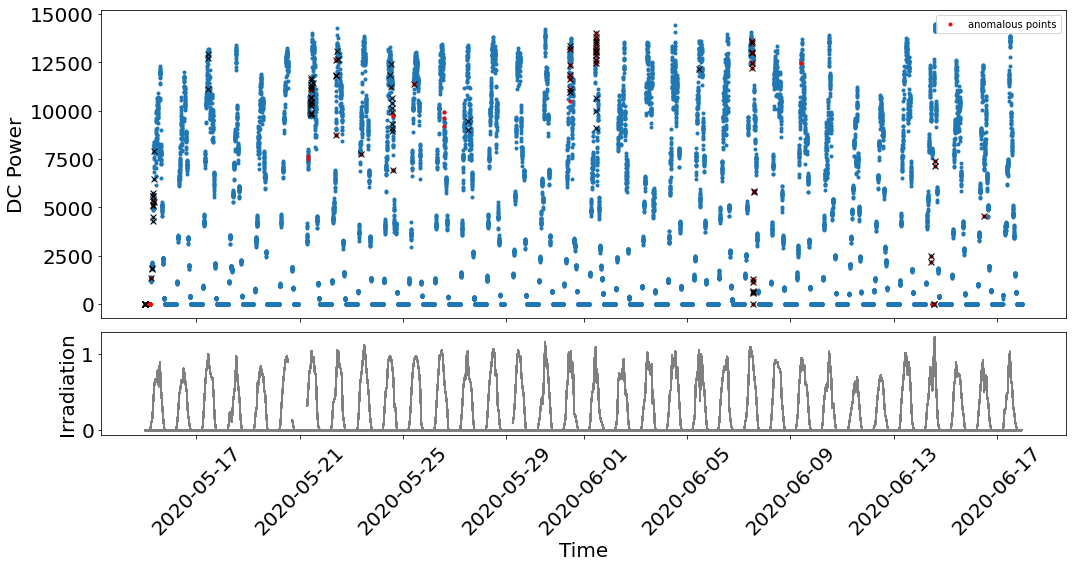

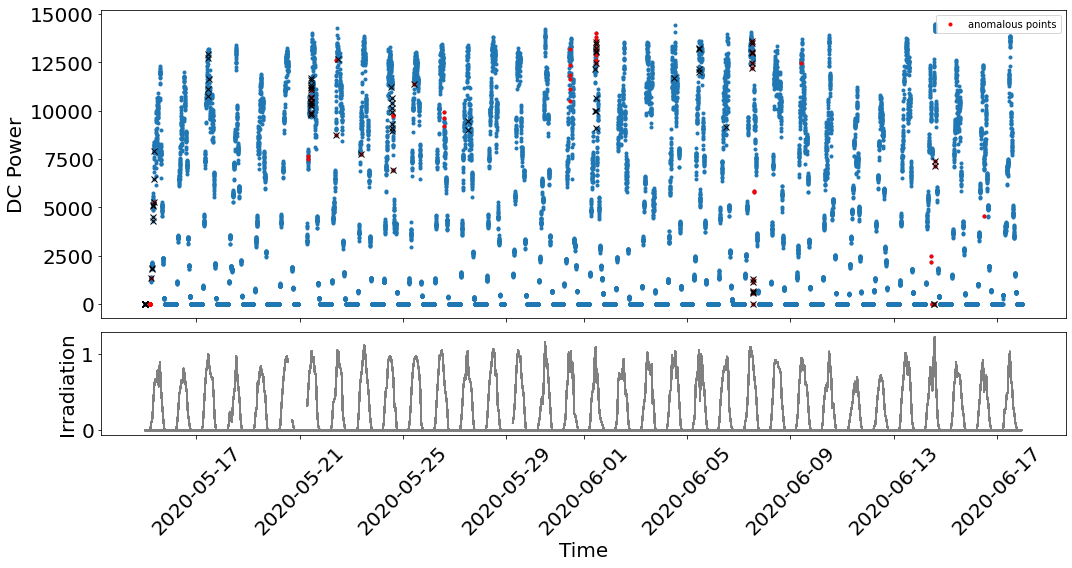

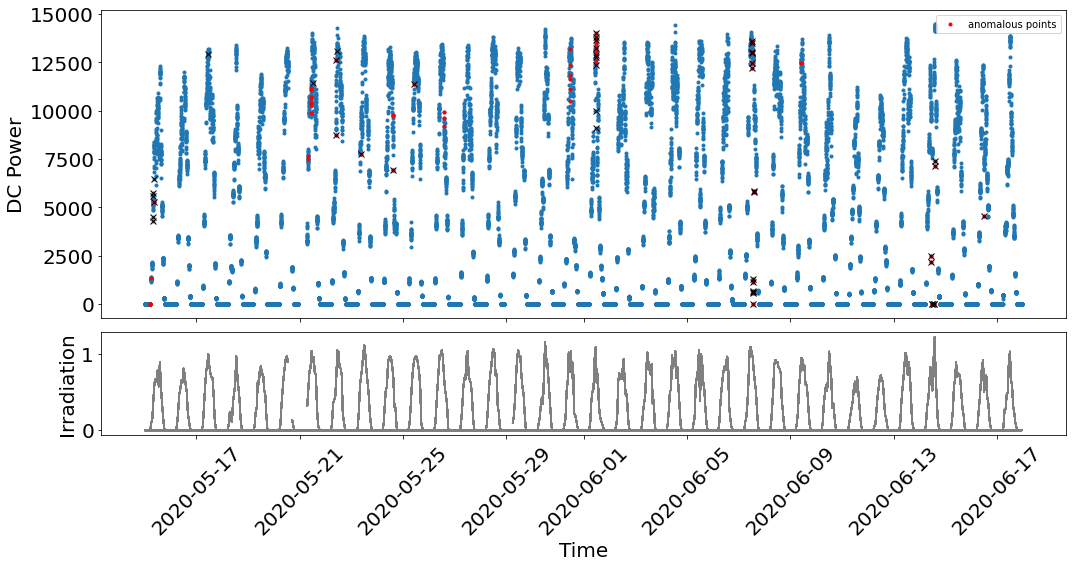

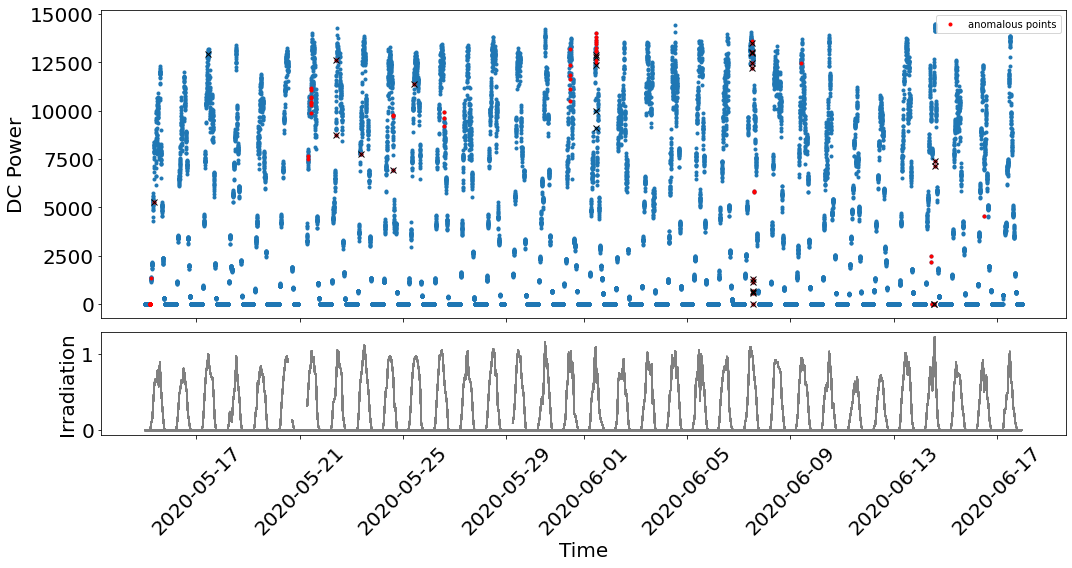

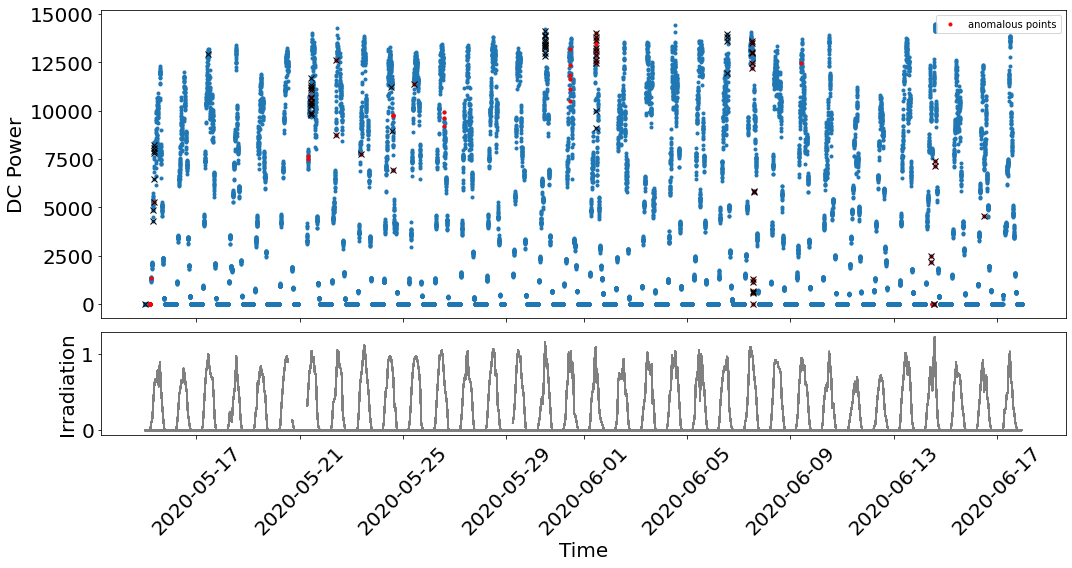

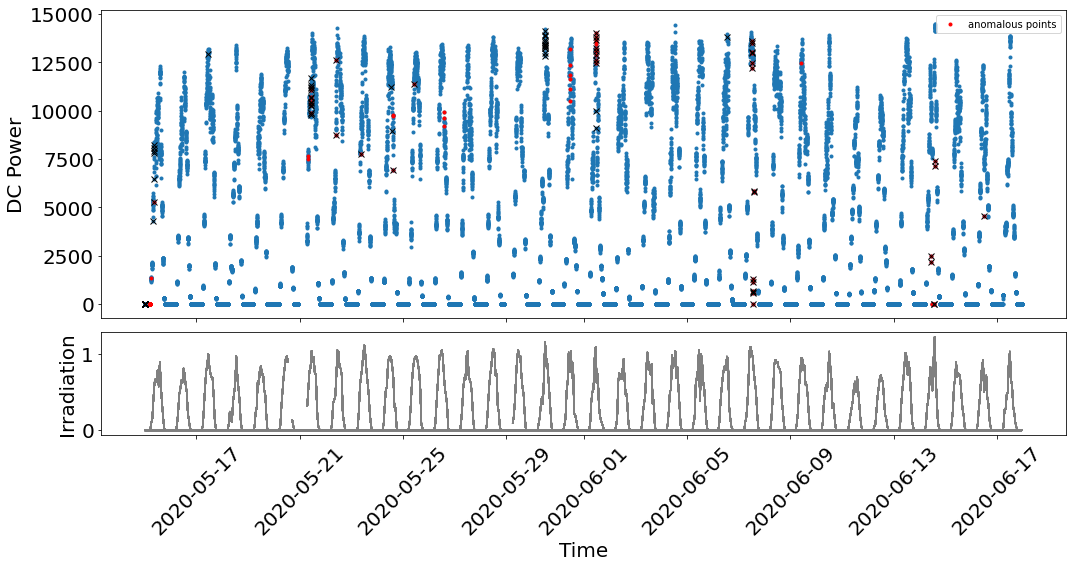

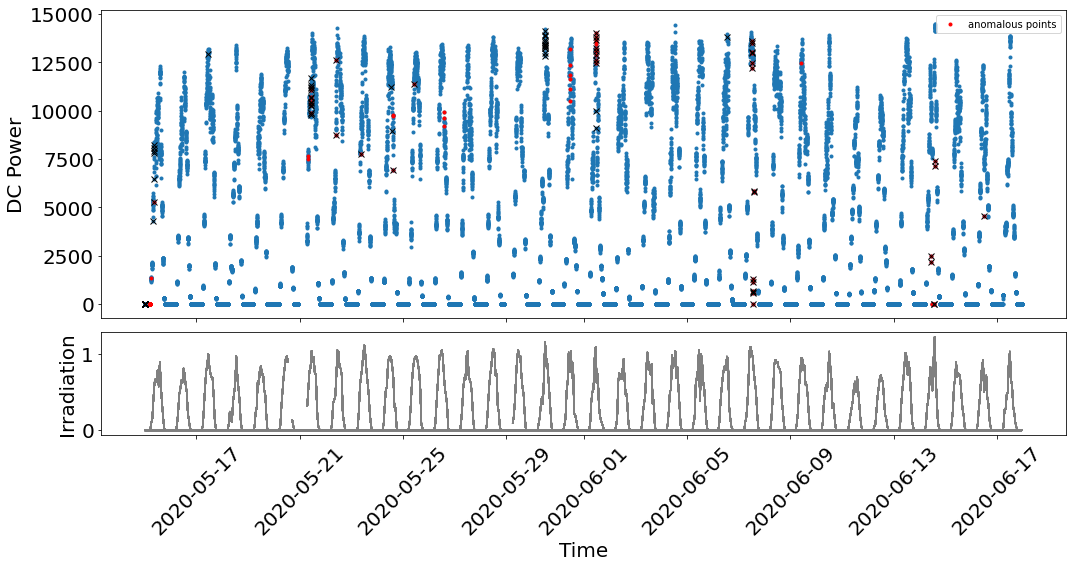

In [24]:
%matplotlib inline
for col in columns:
    if col!=column:
        f, ax=plt.subplots(2,1, figsize=(15, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
        ax[0].plot(data_h['DATE_TIME'], data_h['DC_POWER'], '.')
        ax[0].plot(data_h[data_h["alarm_DC_conversion_outlier"]==1]['DATE_TIME'], 
                 data_h[data_h["alarm_DC_conversion_outlier"]==1]['DC_POWER'], 'r.', label="anomalous points")
        ax[0].plot(data_h[data_h[col]==1]['DATE_TIME'], 
                 data_h[data_h[col]==1]['DC_POWER'], 'kx')
        ax[1].plot(data_h['DATE_TIME'], 
                 data_h['IRRADIATION'], color='gray')
        plt.xticks(rotation=45, fontsize=20)
        ax[1].set_xlabel('Time', fontsize=20)
        ax[0].set_ylabel('DC Power', fontsize=20)
        ax[1].set_ylabel('Irradiation', fontsize=20)
        ax[0].legend()
        ax[0].tick_params(labelsize=20)
        ax[1].tick_params(labelsize=20)
        #ax[0].set_title(col)
        plt.tight_layout()

In [100]:
data_h=data.set_index('DATE_TIME').resample('1h')[columns+['DC_POWER', 'IRRADIATION']].max().reset_index()
data_h[data_h[columns].sum(axis=1)>1][columns]

,alarm_DC_conversion_outlier,alarm_DC_conversion_outlier_lin,alarm_DC_conversion_outlier_linp,alarm_DC_conversion_outlier_dt,alarm_DC_conversion_outlier_dtp,alarm_DC_conversion_outlier_ae,alarm_DC_conversion_outlier_aem,alarm_DC_conversion_outlier_aef
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
6,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
59,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
154,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
156,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
178,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
179,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
column="alarm_DC_conversion_outlier"
columns=[col for col in data_h.columns if (column in col)]
for col in columns:
    print(data_h.groupby(column)[col].value_counts())

alarm_DC_conversion_outlier  alarm_DC_conversion_outlier
0.0                          0.0                            17353
1.0                          1.0                               84
Name: alarm_DC_conversion_outlier, dtype: int64
alarm_DC_conversion_outlier  alarm_DC_conversion_outlier_lin
0.0                          0.0                                17293
                             1.0                                   60
1.0                          1.0                                   52
                             0.0                                   32
Name: alarm_DC_conversion_outlier_lin, dtype: int64
alarm_DC_conversion_outlier  alarm_DC_conversion_outlier_linp
0.0                          0.0                                 17297
                             1.0                                    56
1.0                          0.0                                    49
                             1.0                                    35
Name: alarm_DC_conversio

In [26]:
data['DATE_TIME_r'] = data['DATE_TIME'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,0))
data_h['DATE_TIME_r'] = data_h['DATE_TIME']
data_m=pd.merge(data, data_h, on=['DATE_TIME_r'], suffixes=("", "_agg"))

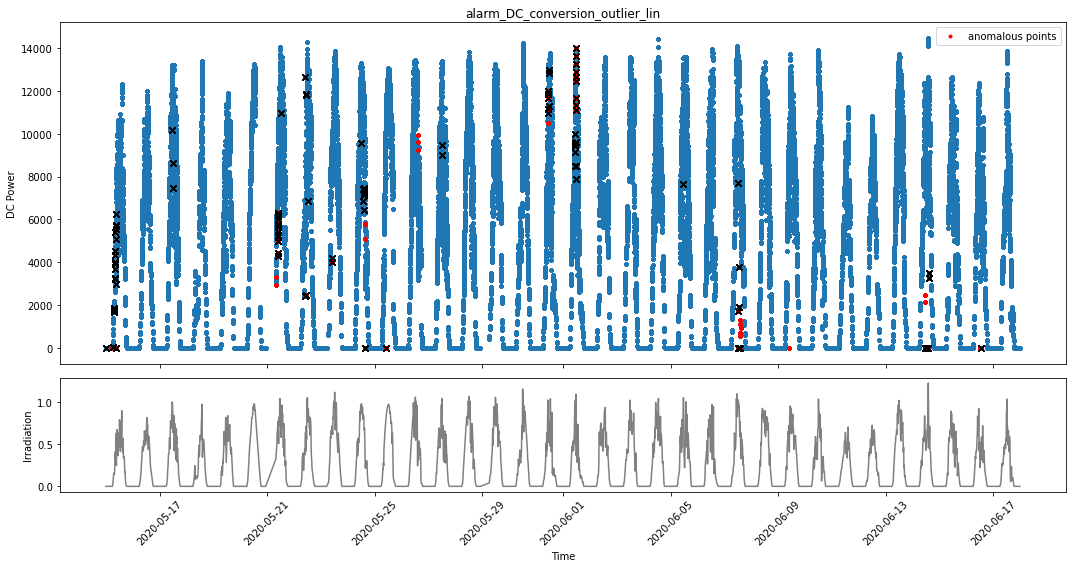

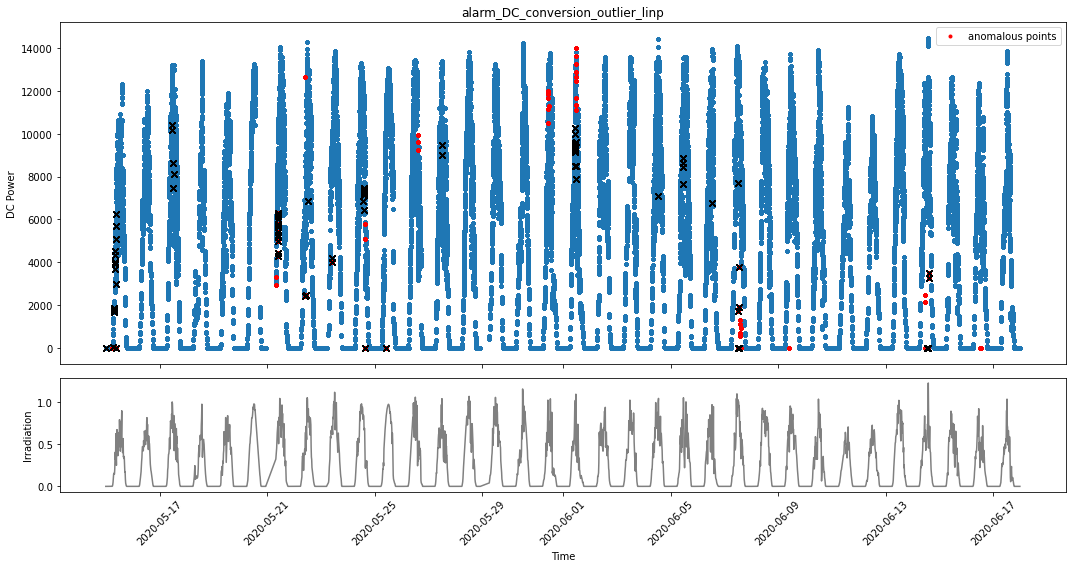

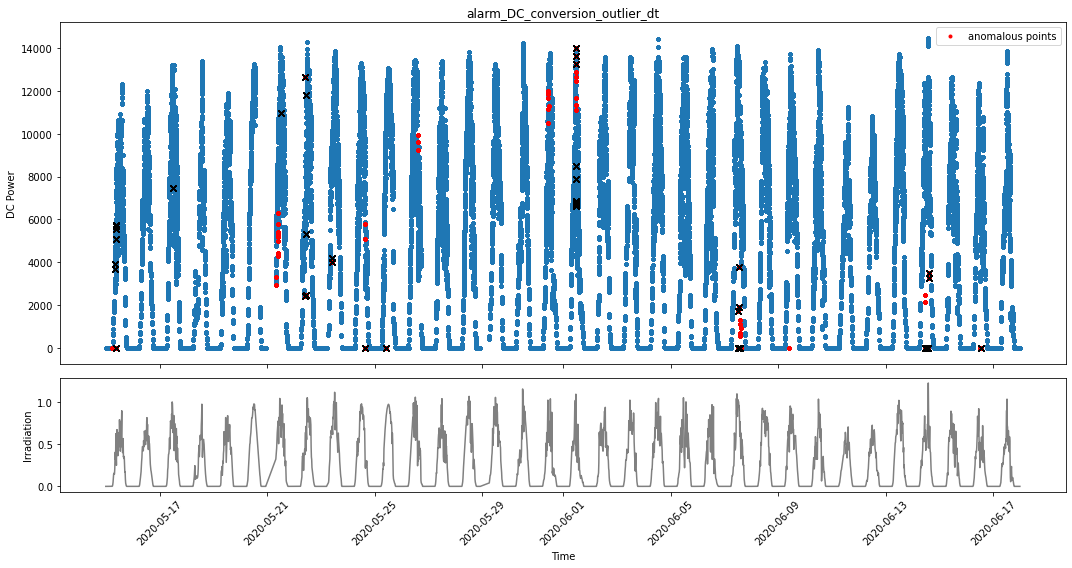

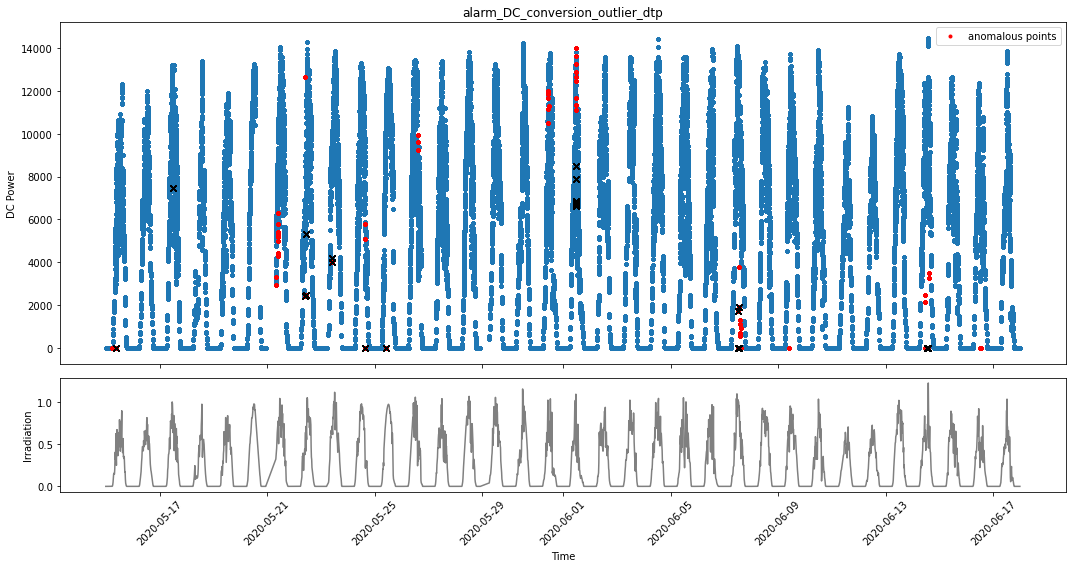

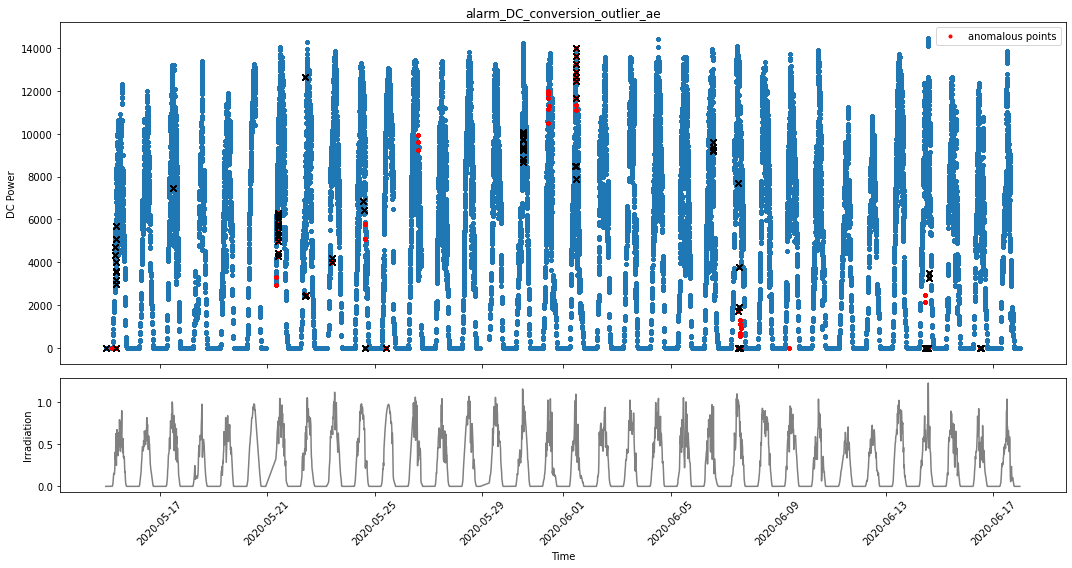

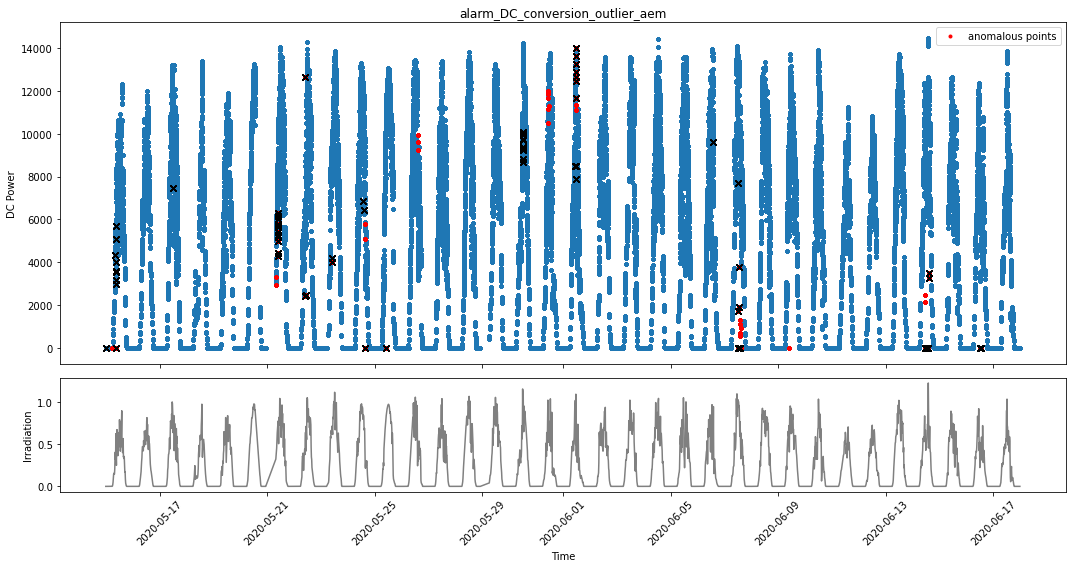

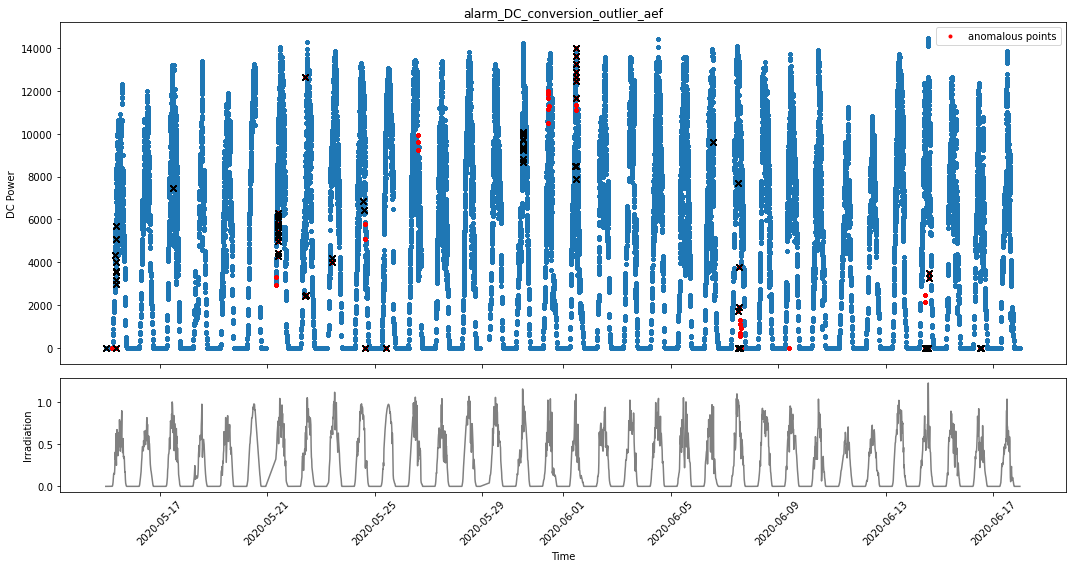

In [27]:
%matplotlib inline
for col in columns:
    if col!=column:
        f, ax=plt.subplots(2,1, figsize=(15, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
        ax[0].plot(data_m['DATE_TIME'], data_m['DC_POWER'], '.')
        ax[0].plot(data_m[data_m["alarm_DC_conversion_outlier"]==1]['DATE_TIME'], 
                 data_m[data_m["alarm_DC_conversion_outlier"]==1]['DC_POWER'], 'r.', label="anomalous points")
        ax[0].plot(data_m[data_m[col]==1]['DATE_TIME'], 
                 data_m[data_m[col]==1]['DC_POWER'], 'kx')
        ax[1].plot(data_m['DATE_TIME'], 
                 data_m['IRRADIATION'], color='gray')
        plt.xticks(rotation=45)
        ax[1].set_xlabel('Time')
        ax[0].set_ylabel('DC Power')
        ax[1].set_ylabel('Irradiation')
        ax[0].legend()
        ax[0].set_title(col)
        plt.tight_layout()

In [28]:
column="alarm_inefficient_inverter_day"
columns=[col for col in data_d.columns if column in col]
for col in columns:
    print(data_d.groupby(column)[col].value_counts())

alarm_inefficient_inverter_day  alarm_inefficient_inverter_day
0                               0                                 690
1                               1                                  58
Name: alarm_inefficient_inverter_day, dtype: int64
alarm_inefficient_inverter_day  alarm_inefficient_inverter_day_lin
0                               0                                     673
                                1                                      17
1                               0                                      41
                                1                                      17
Name: alarm_inefficient_inverter_day_lin, dtype: int64
alarm_inefficient_inverter_day  alarm_inefficient_inverter_day_linp
0                               0                                      674
                                1                                       16
1                               1                                       42
                                0  

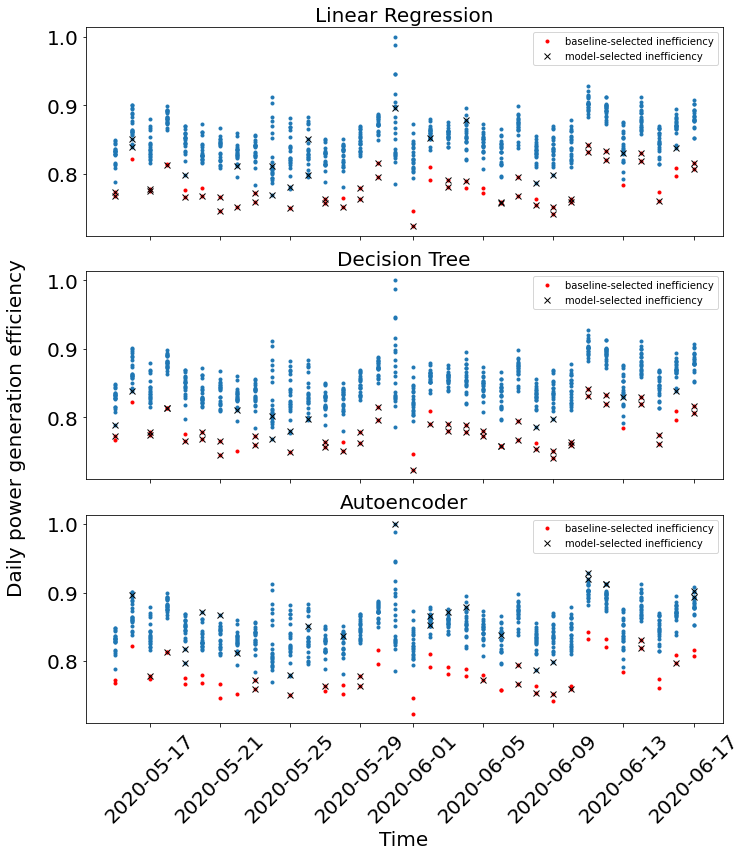

In [29]:
%matplotlib inline
titles=["Linear Regression", "Decision Tree", "Autoencoder"]
f, ax=plt.subplots(3,1, figsize=(10, 12), sharex=True)
i=0
for col in columns:
    if(col[-3:]!="lin")&(col[-2:]!="dt")&(col!=column)&(col[-2:]!="ae")&(col[-3:]!="aem"):
        ax[i].plot(data_d[data_d['alarm_inefficient_inverter_day']!=1].DATE, data_d[data_d['alarm_inefficient_inverter_day']!=1].DC_efficiency, '.')
        ax[i].plot(data_d[data_d['alarm_inefficient_inverter_day']==1].DATE, data_d[data_d['alarm_inefficient_inverter_day']==1].DC_efficiency, "r.", label="baseline-selected inefficiency")    
        ax[i].plot(data_d[data_d[col]==1].DATE, data_d[data_d[col]==1].DC_efficiency, "kx", label="model-selected inefficiency")    
        ax[i].set_title(titles[i], fontsize=20)
        #ax[i].set_ylabel("Daily power generation efficiency", fontsize=20)
        ax[i].legend()
        ax[0].tick_params(labelsize=20)
        ax[1].tick_params(labelsize=20)
        ax[2].tick_params(labelsize=20)
        i+=1
f.text(-0.04, 0.5, 'Daily power generation efficiency', va='center', rotation='vertical', fontsize=20)
#plt.set_ylabel("Daily power generation efficiency", fontsize=20)
plt.xticks(rotation=45)
ax[i-1].set_xlabel('Time', fontsize=20)
plt.tight_layout()

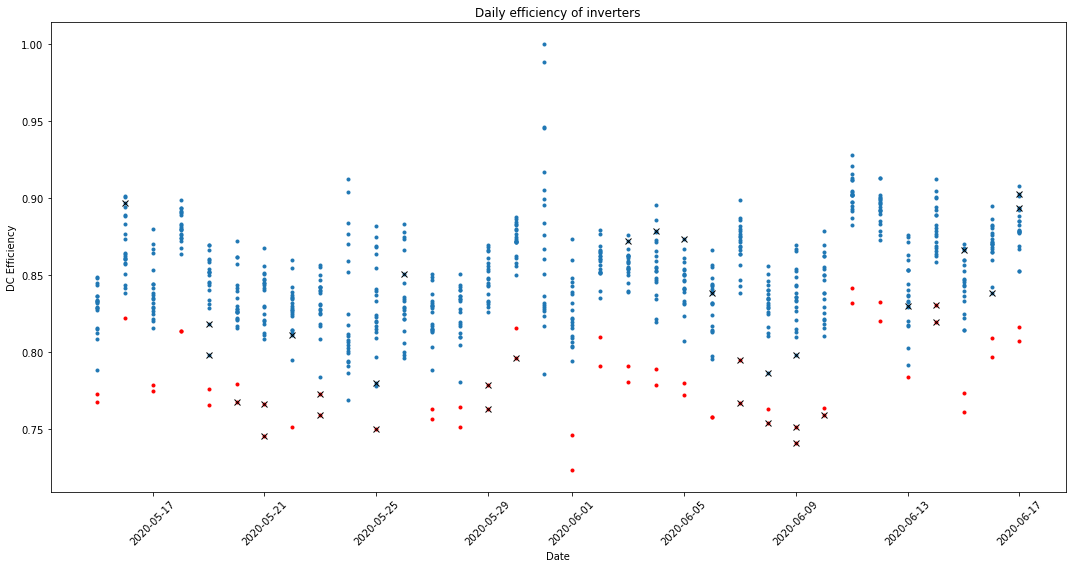

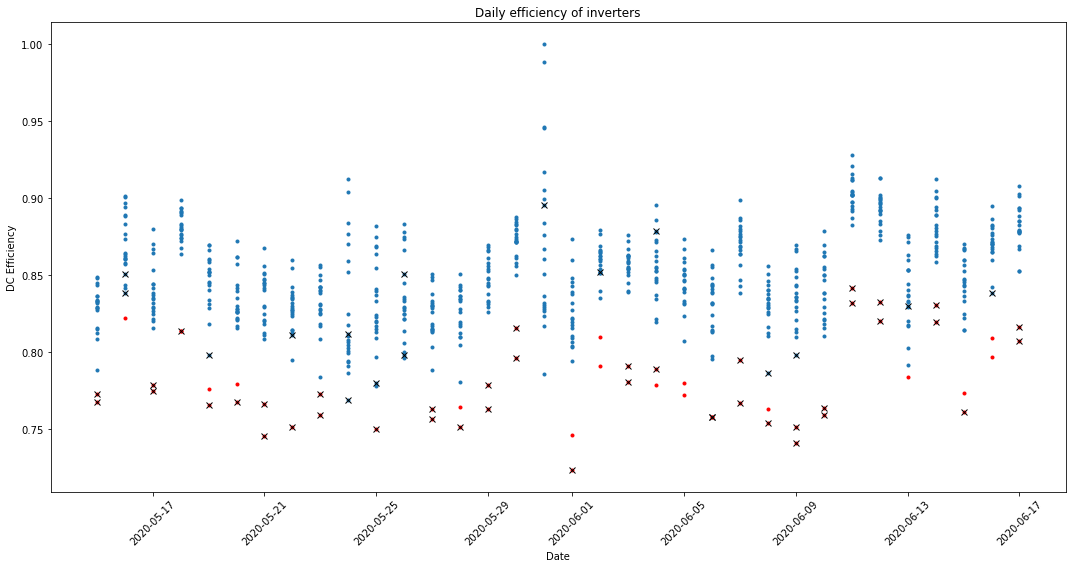

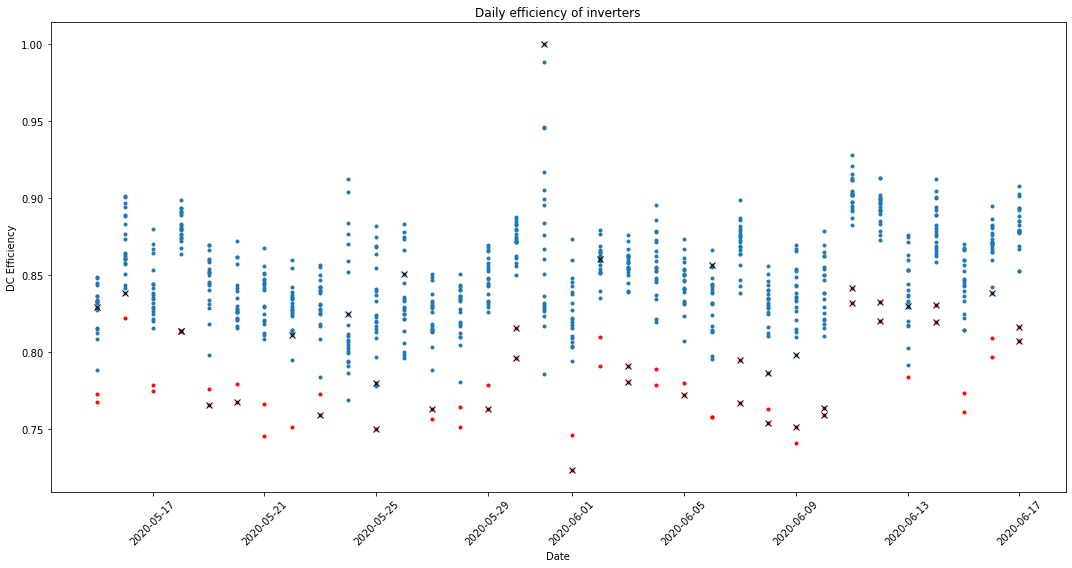

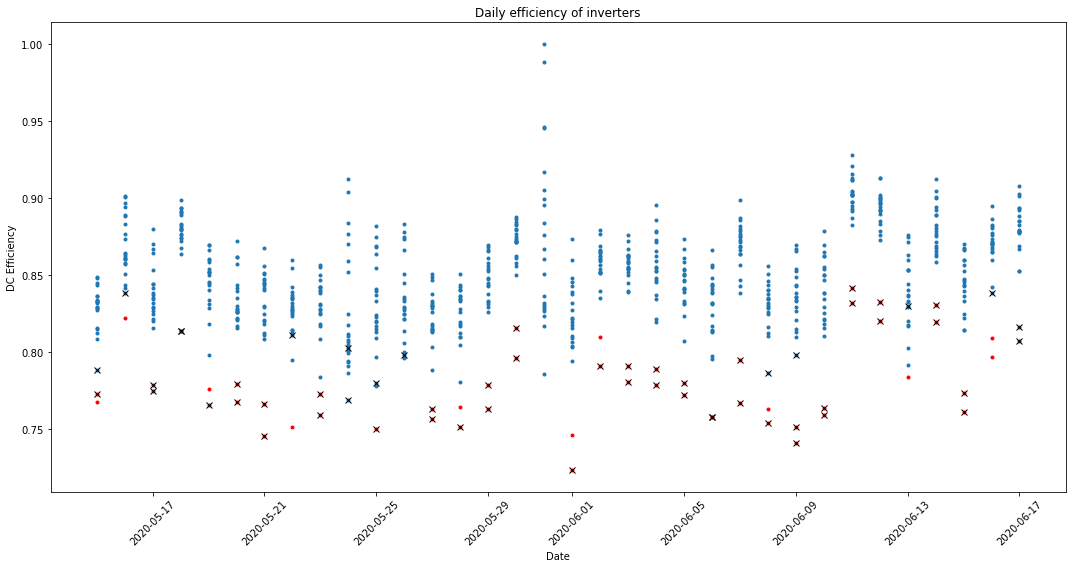

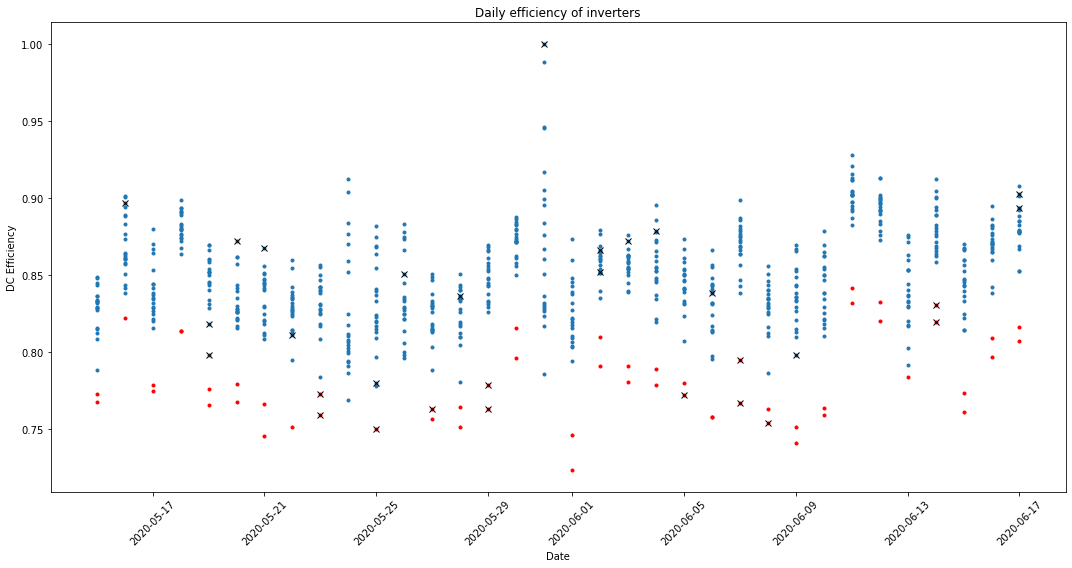

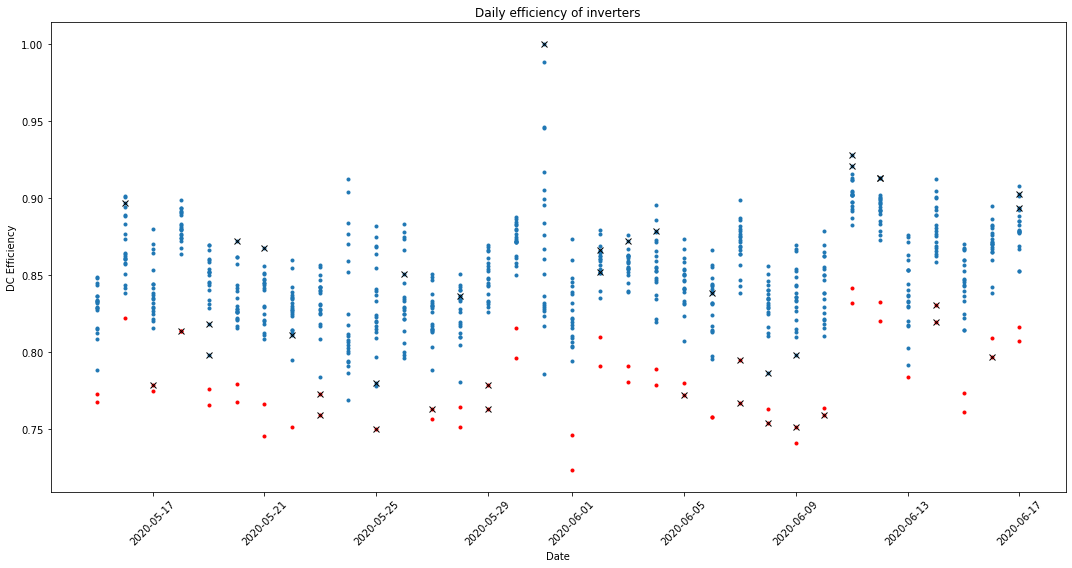

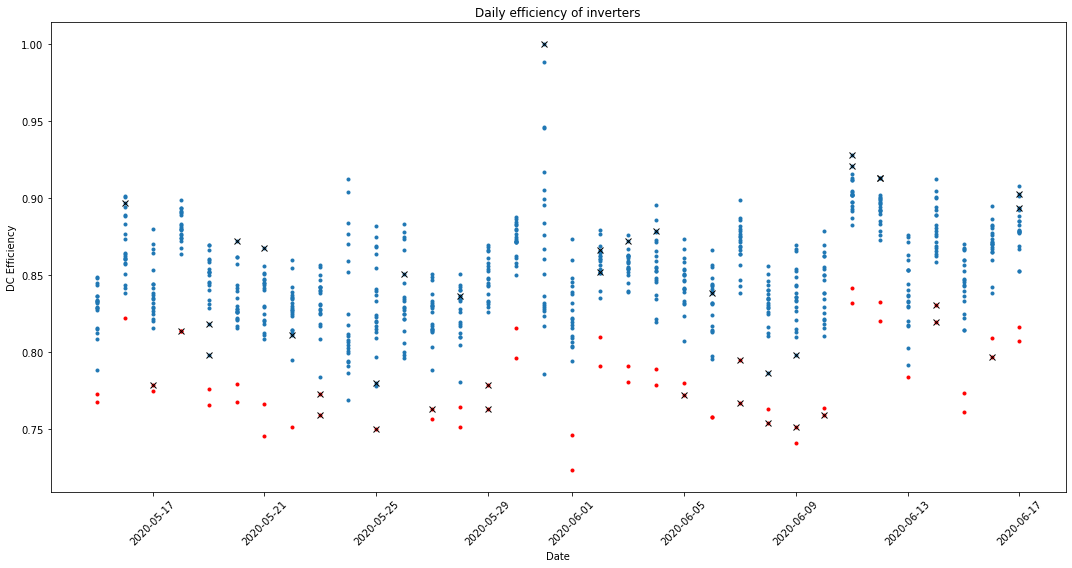

In [30]:
for col in columns:
    if col!=column:
        plt.figure(figsize=(15, 8))
        plt.plot(data_d[data_d['alarm_inefficient_inverter_day']!=1].DATE, data_d[data_d['alarm_inefficient_inverter_day']!=1].DC_efficiency, '.')
        plt.plot(data_d[data_d['alarm_inefficient_inverter_day']==1].DATE, data_d[data_d['alarm_inefficient_inverter_day']==1].DC_efficiency, "r.")    
        plt.plot(data_d[data_d[col]==1].DATE, data_d[data_d[col]==1].DC_efficiency, "kx")    
        plt.xticks(rotation=45)
        #plt.ylim(daily_inv_error_df.ERROR.min()-0.001,daily_inv_error_df.ERROR.max()+0.001)
        plt.xlabel('Date')
        plt.ylabel('DC Efficiency')
        #plt.legend(loc="upper right", title="Inverters", bbox_to_anchor=(1.20,  1))
        plt.title('Daily efficiency of inverters')
        plt.tight_layout()

In [31]:
column="alarm_negative_trend"
columns=[col for col in data_d.columns if column in col]
for col in columns:
    print(data_d.groupby(column)[col].value_counts())

alarm_negative_trend  alarm_negative_trend
0                     0                       745
1                     1                         3
Name: alarm_negative_trend, dtype: int64
alarm_negative_trend  alarm_negative_trend_temp
0                     0                            745
1                     1                              3
Name: alarm_negative_trend_temp, dtype: int64
alarm_negative_trend  alarm_negative_trend_lin
0                     0                           743
                      1                             2
1                     0                             3
Name: alarm_negative_trend_lin, dtype: int64
alarm_negative_trend  alarm_negative_trend_linp
0                     0                            745
1                     0                              3
Name: alarm_negative_trend_linp, dtype: int64
alarm_negative_trend  alarm_negative_trend_dt
0                     0                          745
1                     0                            3
Na

In [32]:
column="alarm_DC_conversion_fall"
columns=[col for col in data_d.columns if column in col]
for col in columns:
    print(data_d.groupby(column)[col].value_counts())

alarm_DC_conversion_fall  alarm_DC_conversion_fall
0                         0                           741
1                         1                             7
Name: alarm_DC_conversion_fall, dtype: int64
alarm_DC_conversion_fall  alarm_DC_conversion_fall_lin
0                         0                               696
                          1                                45
1                         0                                 5
                          1                                 2
Name: alarm_DC_conversion_fall_lin, dtype: int64
alarm_DC_conversion_fall  alarm_DC_conversion_fall_linp
0                         0                                710
                          1                                 31
1                         0                                  5
                          1                                  2
Name: alarm_DC_conversion_fall_linp, dtype: int64
alarm_DC_conversion_fall  alarm_DC_conversion_fall_dt
0                       